In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

rcParams.update({'font.family':'Arial','font.size':18})

14 8 80


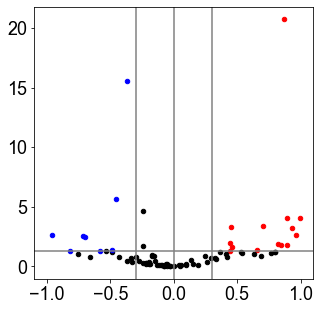

In [7]:
corr1 = []
corr2 = []
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
for i in os.listdir("./BRCA_data/"):
    d = {'Mes':[],'Epi':[],'basal':[],'p-EMT':[],'luminal':[],'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION':[]}
    with open("./BRCA_data/"+i+"/"+os.listdir("./BRCA_data/"+i+"/")[1]+"/ssgsea_report/gseapy.samples.normalized.es.txt") as f:
        for l in f:
            x = l[:-1].split("\t")
            if x[0] in ['basal','luminal','Mes','Epi','p-EMT','pEMT','HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION']:
                if x[0] in ['p-EMT','pEMT']:
                    x[0] = 'p-EMT'
                d[x[0]] = [float(i) for i in x[1:]]
    corr = ss.pearsonr(d["basal"],d["Epi"])
    corr1.append(corr[0])
    corr2.append(corr[1])

c0 = c1 = c2 = 0
for i,j in enumerate(corr1):
    c0 += 1
    if j >= 0.3 and corr2[i] <= 0.05:
        c1 += 1
        plt.scatter([j],-1*np.log10([corr2[i]]),c='red',s=20)
    elif j <= -0.3 and corr2[i] <= 0.05:
        c2 += 1
        plt.scatter([j],-1*np.log10([corr2[i]]),c='blue',s=20)
    else:
        plt.scatter([j],-1*np.log10([corr2[i]]),c='black',s=20)
print(c1,c2,c0)
plt.xlim([-1.1,1.1])
plt.axhline(y = 1.301,c='grey')
plt.axvline(x = 0.3,c='grey')
plt.axvline(x = 0,c='grey')
plt.axvline(x = -0.3,c='grey')
plt.savefig("BRCA_lum_mes_14_8.png",dpi=800)

GSE100716
GSE101723
GSE104740
GSE111636
GSE115485
GSE115800
GSE118572
GSE120736
GSE121711
GSE122306
GSE123610
GSE124305
GSE128192
GSE128702
GSE128959
GSE13507
GSE140457
GSE145260
GSE147709
GSE148322
GSE164828
GSE185264
GSE23732
GSE28255
GSE31684
GSE32548
GSE37317
GSE38264
GSE48075
GSE48276
GSE48277
GSE57813
GSE64279
GSE65635
GSE67312
GSE71576
GSE77952
GSE83586
GSE86411
GSE87304
GSE93940
GSE97782
GSE98980
3 14


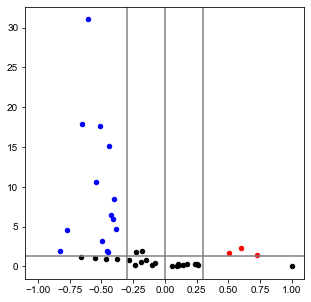

In [8]:
corr1 = []
corr2 = []
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)

for i in os.listdir("./BLCA_data/"):
    print(i)
    d = {'basal':[],'Mes':[],'p-EMT':[],'luminal':[],'Epi':[], 'CD70':[]}
    
    c = 0
    gene_of_int = "PPARG"
    with open("./BLCA_data/"+i+"/"+i+"_gene-exp.txt") as f:
        for line in f:
            a = line[:-1].split("\t")
            if a[0] == gene_of_int:
                c += 1
                d[gene_of_int] = [float(i) for i in a[2:]]
        if c == 0:
            continue
    
    with open("./BLCA_data/"+i+"/gseapy.samples.normalized.es.txt") as f:
        for l in f:
            x = l[:-1].split("\t")
            
            if x[0] in ['basal','Mes','Mest','Mesc','p-EMT','pEMT','luminal','Epi','Epit','Epic']:
                if x[0] in ['p-EMT','pEMT']:
                    x[0] = 'p-EMT'
                if x[0] in ['Mes','Mest','Mesc']:
                    x[0] = 'Mes'
                if x[0] in ['Epi','Epit','Epic']:
                    x[0] = 'Epi'
                d[x[0]] = [float(i) for i in x[1:]]
    if d['basal'] == [] or d['p-EMT'] == []:
        continue
    corr = ss.pearsonr(d["basal"],d[gene_of_int])
    corr1.append(corr[0])
    corr2.append(corr[1])

c1 = c2 = 0
for i,j in enumerate(corr1):
    if j >= 0.3 and corr2[i] <= 0.05:
        c1 += 1
        plt.scatter([j],-1*np.log10([corr2[i]]),c='red',s=20)
    elif j <= -0.3 and corr2[i] <= 0.05:
        c2 += 1
        plt.scatter([j],-1*np.log10([corr2[i]]),c='blue',s=20)
    else:
        plt.scatter([j],-1*np.log10([corr2[i]]),c='black',s=20)
print(c1,c2)
plt.xlim([-1.1,1.1])
plt.axhline(y = 1.301,c='grey')
plt.axvline(x = 0.3,c='grey')
plt.axvline(x = 0,c='grey')
plt.axvline(x = -0.3,c='grey')
#plt.savefig("BLCA_bas_pEMT_22_1.png",dpi=800)

Ttest_relResult(statistic=2.9207562705065677, pvalue=0.006161299592316718)


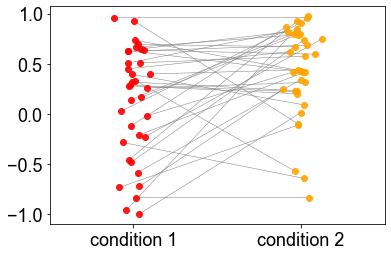

In [90]:
befores = []
afters = []
mids = []

for i in os.listdir("./BRCA_data/"):
    d = {'Mes':[],'basal':[],'p-EMT':[]}
    with open("./BRCA_data/"+i+"/"+os.listdir("./BRCA_data/"+i+"/")[1]+"/ssgsea_report/gseapy.samples.normalized.es.txt") as f:
        for l in f:
            x = l[:-1].split("\t")
            
            if x[0] in ['basal','Mes','p-EMT','pEMT','luminal','Epi']:
                if x[0] in ['p-EMT','pEMT']:
                    x[0] = 'p-EMT'
                d[x[0]] = [float(i) for i in x[1:]]
    lum_epi = ss.pearsonr(d["luminal"],d["Epi"])
    mes_basal = ss.pearsonr(d["basal"],d["Mes"])
    pemt_basal = ss.pearsonr(d["basal"],d["p-EMT"])
    
    if lum_epi[1] < 0.05:
        befores.append(lum_epi[0])
    if mes_basal[1] < 0.05 or pemt_basal[1] < 0.05:
        afters.append(mes_basal[0])
        mids.append(pemt_basal[0])
    #break

print(ss.ttest_rel(mids, afters))

"""f = plt.figure()
f.set_figwidth(5)
f.set_figheight(4)
sns.kdeplot(befores,fill=True,color='Grey',bw=0.25)
#sns.kdeplot(mids,fill=True,color='Orange',bw=0.25)
sns.kdeplot(afters,fill=True,color='#D31D0D',bw=0.25)

plt.savefig("Epi_Mes_BRCA.png",dpi=800)
plt.close()"""

df = pd.DataFrame({'condition 1': afters,'condition 2': mids})

jitter = 0.05
df_x_jitter = pd.DataFrame(np.random.normal(loc=0, scale=jitter, size=df.values.shape), columns=df.columns)
df_x_jitter += np.arange(len(df.columns))

fig, ax = plt.subplots()
for col in df:
    if col[-1] == '1':
        ax.plot(df_x_jitter[col], df[col], 'o', alpha=.9, zorder=1, ms=6, mew=1, color='red')
    if col[-1] == '2':
        ax.plot(df_x_jitter[col], df[col], 'o', alpha=.9, zorder=1, ms=6, mew=1, color='orange')
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns)
ax.set_xlim(-0.5,len(df.columns)-0.5)

for idx in df.index:
    ax.plot(df_x_jitter.loc[idx,['condition 1','condition 2']], df.loc[idx,['condition 1','condition 2']], color = 'grey', linewidth = 0.5, linestyle = '-', zorder=-1)

plt.savefig("BRCA_mes_pEMT.png",dpi=800)

GSE100716
GSE101723
GSE104740
GSE111636
GSE115485
GSE115800
GSE118572
GSE120736
GSE121711
GSE122306
GSE123610
GSE124305
GSE128192
GSE128702
GSE128959
GSE13507
GSE140457
GSE145260
GSE147709
GSE148322
GSE164828
GSE185264
GSE23732
GSE28255
GSE31684
GSE32548
GSE37317
GSE38264
GSE48075
GSE48276
GSE48277
GSE57813
GSE64279
GSE65635
GSE67312
GSE71576
GSE77952
GSE83586
GSE86411
GSE87304
GSE93940
GSE97782
GSE98980
Ttest_relResult(statistic=7.724162591995821, pvalue=5.839607443598076e-08)


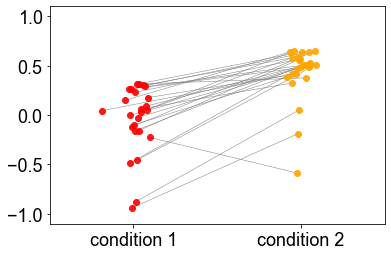

In [91]:
befores = []
mids = []
afters = []

for i in os.listdir("./BLCA_data/"):
    print(i)
    d = {'basal':[],'Mes':[],'p-EMT':[],'luminal':[],'Epi':[]}
    with open("./BLCA_data/"+i+"/gseapy.samples.normalized.es.txt") as f:
        for l in f:
            x = l[:-1].split("\t")
            
            if x[0] in ['basal','Mes','Mest','Mesc','p-EMT','pEMT','luminal','Epi','Epit','Epic']:
                if x[0] in ['p-EMT','pEMT']:
                    x[0] = 'p-EMT'
                if x[0] in ['Mes','Mest','Mesc']:
                    x[0] = 'Mes'
                if x[0] in ['Epi','Epit','Epic']:
                    x[0] = 'Epi'
                d[x[0]] = [float(i) for i in x[1:]]
    if d['basal'] == [] or d['p-EMT'] == []:
        continue
    lum_epi = ss.pearsonr(d["luminal"],d["Epi"])
    mes_basal = ss.pearsonr(d["basal"],d["Mes"])
    pemt_basal = ss.pearsonr(d["basal"],d["p-EMT"])
    
    if lum_epi[1] < 0.05:
        befores.append(lum_epi[0])
    if mes_basal[1] < 0.05 or pemt_basal[1] < 0.05:
        afters.append(mes_basal[0])
        mids.append(pemt_basal[0])
    #break

"""f = plt.figure()
f.set_figwidth(5)
f.set_figheight(4)
sns.kdeplot(befores,fill=True,color='Grey',bw=0.3)
#sns.kdeplot(mids,fill=True,color='Orange',bw=0.3)
sns.kdeplot(afters,fill=True,color='#D31D0D',bw=0.3)

plt.savefig("Epi_Mes_BLCA.png",dpi=800)
plt.close()"""

print(ss.ttest_rel(mids, afters))

df = pd.DataFrame({'condition 1': afters,'condition 2': mids})

jitter = 0.05
df_x_jitter = pd.DataFrame(np.random.normal(loc=0, scale=jitter, size=df.values.shape), columns=df.columns)
df_x_jitter += np.arange(len(df.columns))

fig, ax = plt.subplots()
for col in df:
    if col[-1] == '1':
        ax.plot(df_x_jitter[col], df[col], 'o', alpha=.9, zorder=1, ms=6, mew=1, color='red')
    if col[-1] == '2':
        ax.plot(df_x_jitter[col], df[col], 'o', alpha=.9, zorder=1, ms=6, mew=1, color='orange')
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns)
ax.set_xlim(-0.5,len(df.columns)-0.5)

for idx in df.index:
    ax.plot(df_x_jitter.loc[idx,['condition 1','condition 2']], df.loc[idx,['condition 1','condition 2']], color = 'grey', linewidth = 0.5, linestyle = '-', zorder=-1)
ax.set_ylim([-1.1,1.1])
plt.savefig("BLCA_mes_pEMT.png",dpi=800)

GSE100629
GSE100919
GSE104572
GSE104749
GSE104786
GSE104786 0.7418415431125529 0.7465890997675194
GSE109021
GSE109021 -0.7631662433790902 -0.31271545790679967
GSE113970
GSE114345
GSE114500
GSE117098
GSE118123
GSE125339
GSE130402
GSE130402 0.8577646726410365 0.6274898299954278
GSE130978
GSE130981
GSE130981 0.9894781991895231 0.9725529283081015
GSE133372
GSE135575
GSE135575 0.9992850286858347 0.9955718385077976
GSE141551
GSE141551 0.846871179291129 0.8447724606705981
GSE14405
GSE147566
GSE151187
GSE151187 0.9690855807543666 0.9674751756713507
GSE153352
GSE153352 0.7861088394230403 0.804336384826514
GSE155804
GSE157547
GSE157547 0.8579642967264736 0.8304158067259367
GSE158524
GSE158524 0.8642097688369977 0.8682078869531251
GSE178631
GSE178631 0.7612704377676597 0.7266210181409202
GSE184381
GSE184381 0.8896152929019289 0.8597685074292616
GSE189343
GSE189343 0.9524936070885288 0.8498278526103091
GSE192817
GSE193500
GSE193500 0.7905499134280103 0.5864053133042135
GSE201805
GSE201805 0.834906

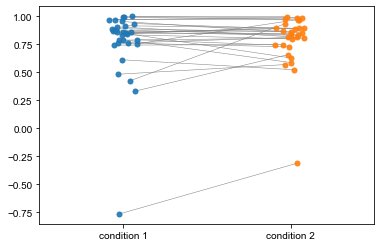

In [81]:
befores = []
afters = []

for i in os.listdir("./PCA_data/"):
    print(i)
    d = {'Mes':[],'basal':[],'p-EMT':[]}
    with open("./PCA_data/"+i+"/gseapy.samples.normalized.es.txt") as f:
        for l in f:
            x = l[:-1].split("\t")
            
            if x[0] in ['basal','Mes','Mest','Mesc','p-EMT','pEMT']:
                if x[0] in ['p-EMT','pEMT']:
                    x[0] = 'p-EMT'
                if x[0] in ['Mes','Mest','Mesc']:
                    x[0] = 'Mes'
                d[x[0]] = [float(i) for i in x[1:]]
    if d['basal'] == [] or d['p-EMT'] == []:
        continue
    mes_basal = ss.pearsonr(d["Mes"],d["basal"])
    pemt_basal = ss.pearsonr(d["p-EMT"],d["basal"])
    
    if mes_basal[1] < 0.01 or pemt_basal[1] < 0.01:
        print(i,mes_basal[0],pemt_basal[0])
        befores.append(mes_basal[0])
        afters.append(pemt_basal[0])
    #break

print(ss.ttest_rel(befores, afters))
    
df = pd.DataFrame({'condition 1': befores,
                   'condition 2': afters})
jitter = 0.05
df_x_jitter = pd.DataFrame(np.random.normal(loc=0, scale=jitter, size=df.values.shape), columns=df.columns)
df_x_jitter += np.arange(len(df.columns))

fig, ax = plt.subplots()
for col in df:
    ax.plot(df_x_jitter[col], df[col], 'o', alpha=.9, zorder=1, ms=5, mew=1)
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns)
ax.set_xlim(-0.5,len(df.columns)-0.5)

for idx in df.index:
    ax.plot(df_x_jitter.loc[idx,['condition 1','condition 2']], df.loc[idx,['condition 1','condition 2']], color = 'grey', linewidth = 0.5, linestyle = '-', zorder=-1)
    